# Analysis of Citibike trips by time

In [ ]:
%load_ext autoreload
%autoreload 2

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as datetime

# import our helpers module. appending parent directory ("..") to sys.path might be necessary for helpers to be imported on some systems
import sys

sys.path.insert(0, "..")
import helpers

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Setup

In [ ]:
DATA_DIR = "../data/"
YEARLY_TRIPS_DIR = DATA_DIR + "tripdata_parquet/NY/"
SUMMARY_DIR = DATA_DIR + "summaries/"

## Get data
* yearly summaries
* trips

In [ ]:
summaries = pd.read_parquet(SUMMARY_DIR + "summaries" + helpers.CSV_EXTENSION)

In [ ]:
%%time
trips = helpers.get_trips(2019)

In [ ]:
trips["starttime"] = pd.to_datetime(trips["starttime"])
trips["stoptime"] = pd.to_datetime(trips["stoptime"])
trips

,tripduration,starttime,stoptime,startstationid,endstationid,bikeid,usertype,birthyear,gender
0,320,2019-01-01 00:01:47.401,2019-01-01 00:07:07.581,3160,3283,15839,Subscriber,1971,1
1,316,2019-01-01 00:04:43.736,2019-01-01 00:10:00.608,519,518,32723,Subscriber,1964,1
2,591,2019-01-01 00:06:03.997,2019-01-01 00:15:55.438,3171,3154,27451,Subscriber,1987,1
3,2719,2019-01-01 00:07:03.545,2019-01-01 00:52:22.650,504,3709,21579,Subscriber,1990,1
4,303,2019-01-01 00:07:35.945,2019-01-01 00:12:39.502,229,503,35379,Subscriber,1979,1
...,...,...,...,...,...,...,...,...,...
20551512,729,2019-10-31 23:59:12.190,2019-11-01 00:11:21.486,237,311,25725,Subscriber,1995,1
20551513,645,2019-10-31 23:59:17.047,2019-11-01 00:10:02.945,3259,461,39583,Customer,1969,0
20551514,257,2019-10-31 23:59:22.514,2019-11-01 00:03:40.260,3798,505,21240,Subscriber,1985,1
20551515,466,2019-10-31 23:59:23.171,2019-11-01 00:07:09.205,328,361,34916,Subscriber,1989,0


## Trips EDA

In [ ]:
trips_per_month = (
    trips.groupby(trips["starttime"].dt.month)["tripduration"]
    .count()
    .reset_index()
    .rename(columns={"starttime": "month", "tripduration": "counttrips"})
)
trips_per_month

,month,counttrips
0,1,967269
1,2,943735
2,3,1327950
3,4,1766094
4,5,1924563
5,6,2125370
6,7,2181010
7,8,2344135
8,9,2444900
9,10,2092573


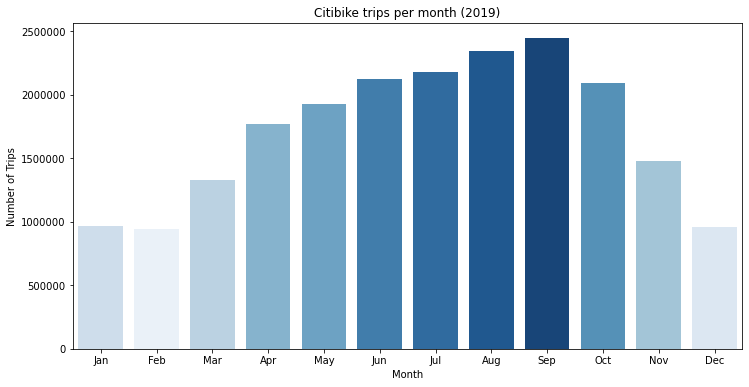

In [ ]:
# Plot trips per month
fig, ax = plt.subplots()
fig.set_size_inches(12, 6)
sns.barplot(
    data=trips_per_month,
    x="month",
    y="counttrips",
    palette=helpers.colors_from_values(trips_per_month.counttrips, "Blues"),
    ax=ax,
)
plt.title("Citibike trips per month (2019)")

# set month labels
plt.xlabel("Month")
monthlabels = [
    datetime.date(1900, month + 1, 1).strftime("%b") for month in trips_per_month.index
]
ax.set_xticks(np.arange(0, 12))
ax.set_xticklabels(monthlabels)

plt.ylabel("Number of Trips")
plt.ticklabel_format(style="plain", axis="y")
plt.show()

del trips_per_month

In [ ]:
# trips by which day of the week it is
trips_per_day_name = (
    trips.groupby(trips["starttime"].dt.day_name())["tripduration"]
    .count()
    .reindex(
        ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
    )
    .reset_index()
    .rename(columns={"starttime": "day_name", "tripduration": "counttrips"})
)
trips_per_day_name

,day_name,counttrips
0,Monday,2922080
1,Tuesday,3157924
2,Wednesday,3146663
3,Thursday,3001212
4,Friday,3117804
5,Saturday,2815248
6,Sunday,2390586


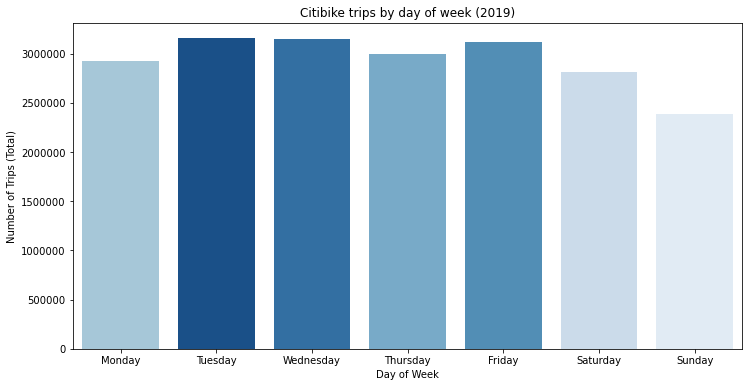

In [ ]:
# Plot trips by day of week
fig, ax = plt.subplots()
fig.set_size_inches(12, 6)
sns.barplot(
    data=trips_per_day_name,
    x="day_name",
    y="counttrips",
    palette=helpers.colors_from_values(trips_per_day_name.counttrips, "Blues"),
    ax=ax,
)
plt.title("Citibike trips by day of week (2019)")

plt.xlabel("Day of Week")
plt.ylabel("Number of Trips (Total)")
plt.ticklabel_format(style="plain", axis="y")
plt.show()

del trips_per_day_name

In [ ]:
trips_per_day = (
    trips.groupby(trips["starttime"].dt.dayofyear)["tripduration"]
    .count()
    .reset_index()
    .rename(columns={"starttime": "dayofyear", "tripduration": "counttrips"})
)
trips_per_day

,dayofyear,counttrips
0,1,21962
1,2,37797
2,3,41676
3,4,43922
4,5,17432
...,...,...
360,361,31808
361,362,28520
362,363,17968
363,364,12138


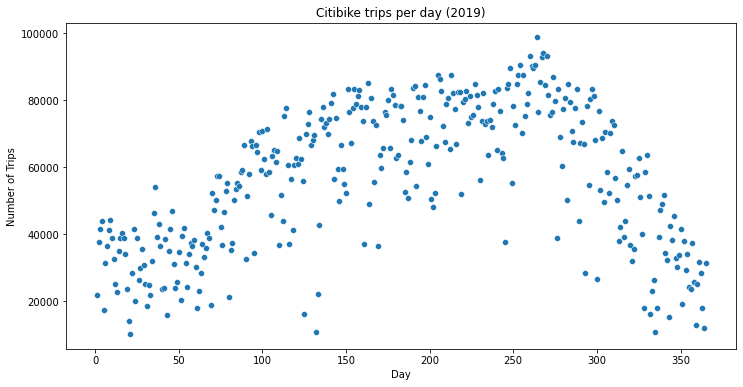

In [ ]:
# Plot trips per day
plt.figure(figsize=(12, 6))
sns.scatterplot(data=trips_per_day, x="dayofyear", y="counttrips")
plt.title("Citibike trips per day (2019)")
plt.xlabel("Day")
plt.ylabel("Number of Trips")
# TODO set xticklabels to use ConciseDateFormatter
plt.show()

del trips_per_day

In [ ]:
# trips by hour of day
trips_per_hour = (
    trips.groupby(trips["starttime"].dt.hour)["tripduration"]
    .count()
    .reset_index()
    .rename(columns={"starttime": "hour", "tripduration": "counttrips"})
)
trips_per_hour

,hour,counttrips
0,0,185329
1,1,105231
2,2,64300
3,3,41554
4,4,44894
5,5,139884
6,6,443042
7,7,933374
8,8,1626759
9,9,1308175


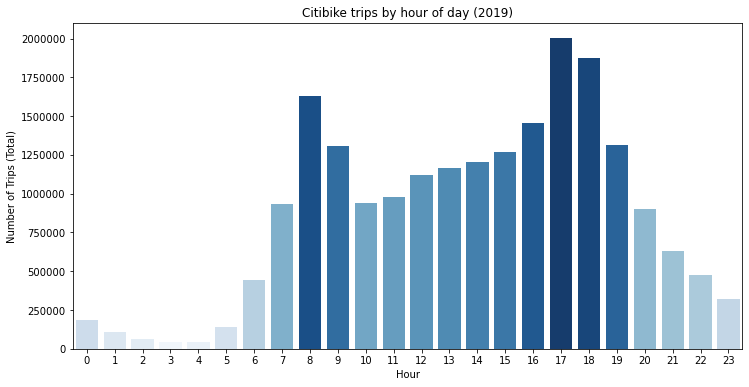

In [ ]:
# Plot trips by hour of day
fig, ax = plt.subplots()
fig.set_size_inches(12, 6)
sns.barplot(
    data=trips_per_hour,
    x="hour",
    y="counttrips",
    palette=helpers.colors_from_values(trips_per_hour.counttrips, "Blues"),
    ax=ax,
)
plt.title("Citibike trips by hour of day (2019)")

plt.xlabel("Hour")
plt.ylabel("Number of Trips (Total)")
plt.ticklabel_format(style="plain", axis="y")
plt.show()

del trips_per_hour